In [46]:
import pandas as pd

data_path = '../data/'

train = pd.read_csv(data_path + 'train.csv', index_col ='id')
test = pd.read_csv(data_path + 'test.csv', index_col ='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col ='id')

In [47]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [48]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [49]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입']).reset_index().rename(columns = {'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫번째 값'] = df.loc[0].values
    summary['두번째 값'] = df.loc[1].values
    summary['세번째 값'] = df.loc[2].values

    return summary
resumetable(train)


데이터셋 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫번째 값,두번째 값,세번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [50]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [51]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [52]:
import numpy as np

print('day 고윳값: ', np.sort(train['day'].unique()))
print('month 고윳값: ', np.sort(train['month'].unique()))
print('target 고윳값: ', train['target'].unique())

day 고윳값:  [1 2 3 4 5 6 7]
month 고윳값:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
target 고윳값:  [0 1]


In [53]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

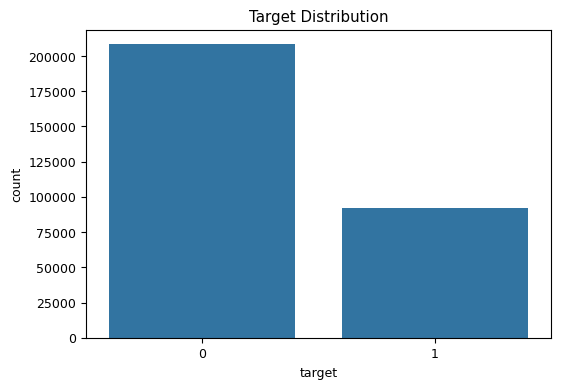

In [54]:
mpl.rc('font', size = 9)
plt.figure(figsize = (6, 4))

ax = sns.countplot(x = 'target', data = train)
ax.set_title('Target Distribution')

In [55]:
rectangle = ax.patches[0]
print('사각형 높이: ', rectangle.get_height())
print('사각형 넓이: ', rectangle.get_width())
print('사각형 왼쪽 태두리 x축 위치: ', rectangle.get_x())

사각형 높이:  208236.0
사각형 넓이:  0.8
사각형 왼쪽 태두리 x축 위치:  -0.4


Text(0.5, 1.0, 'Target Distribution')

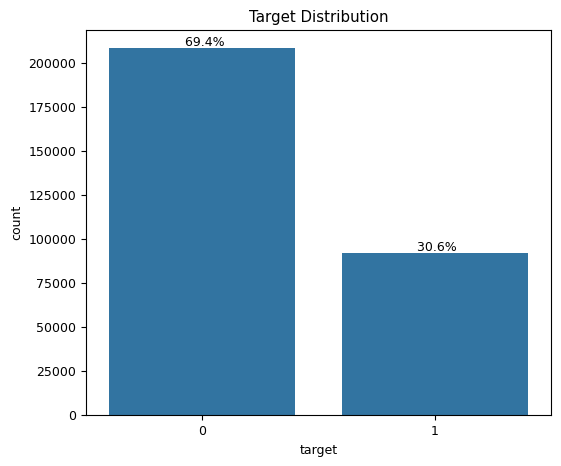

In [56]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        if height == 0:
            continue 
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(x = left_coord + width/2, y = height + total_size*0.005, s= f'{percent: 1.1f}%', ha = 'center')

plt. figure(figsize = (6,5))

ax = sns.countplot(x='target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')


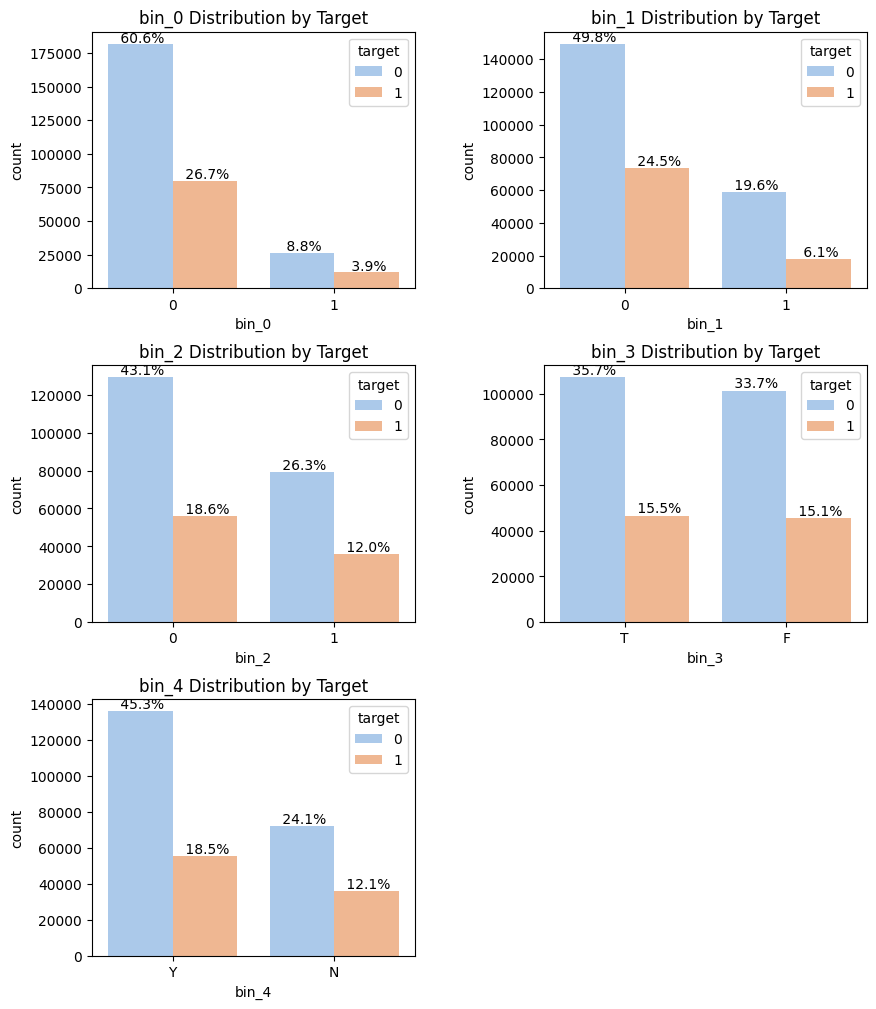

In [57]:
import matplotlib.gridspec as gridspec

mpl.rc('font',size= 10)
grid = gridspec.GridSpec(3,2)
plt.figure(figsize = (10, 12))
plt.subplots_adjust(wspace = 0.4, hspace=0.3)

bin_features = ['bin_0','bin_1','bin_2','bin_3','bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    sns.countplot(x = feature, data = train, hue = 'target', palette = 'pastel', ax = ax)

    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

In [64]:
crosstab = pd.crosstab(train['nom_0'], train['target'],normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [76]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'],normalize = 'index')*100
    crosstab = crosstab.reset_index(    )
    return crosstab

crosstab = get_crosstab(train,'nom_1')
crosstab

target,nom_1,0,1
0,Circle,75.434084,24.565916
1,Polygon,68.453089,31.546911
2,Square,66.106821,33.893179
3,Star,68.937348,31.062652
4,Trapezoid,70.994554,29.005446
5,Triangle,63.902194,36.097806


In [87]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values,
                         color='black', legend=False, markers='o', markersize=4)
    
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax.set_ylabel('Target 1 Ratio(%)')

def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,12)):
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        sns.countplot(x=feature, data=df, order = crosstab[feature].values, color='skyblue', ax = ax)
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)
        ax.set_title(f'{feature} Distribution')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17868\1884232754.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values,
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17868\1884232754.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values,
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17868\1884232754.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters

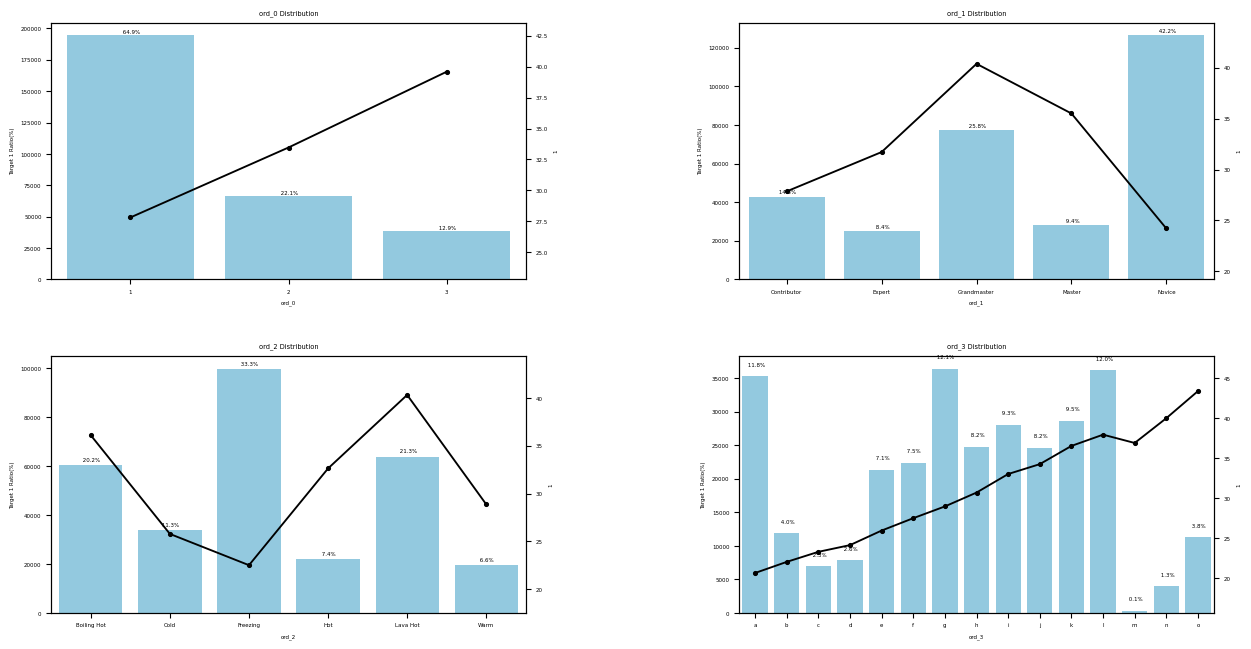

In [88]:
ord_features = ['ord_0','ord_1','ord_2','ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=3, num_cols=2)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17868\1884232754.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values,
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17868\1884232754.py:3: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values,


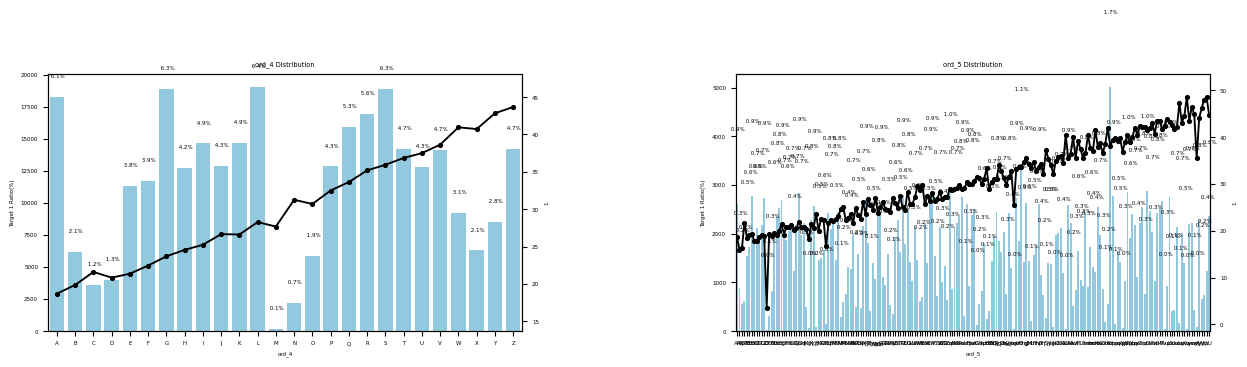

In [89]:
mpl.rc('font',size=4)
plot_cat_dist_with_true_ratio(train, ['ord_4','ord_5'], num_rows=3, num_cols=2,size=(15,12))